# Ensemble Learning — Assignment (Detailed, with Code & Plots)
**Instructions:** Each question from the PDF is included verbatim, followed by a detailed, exam-style answer. Programming questions include step-by-step explanations, runnable code, and plots where appropriate.

---

## Question 1
**What is Ensemble Learning in machine learning? Explain the key idea behind it.**

### Answer

**Ensemble learning** is a strategy where we combine predictions from multiple models (called *base learners*) to produce a single, superior prediction.
The central idea is **“wisdom of the crowd”**: different models make different mistakes; when we aggregate them properly (e.g., averaging, voting, or stacking), the errors can cancel out and overall performance improves.

**Why it works:**
- **Reduces variance**: Averaging many high-variance models (like decision trees) stabilizes predictions.
- **Reduces bias**: Carefully sequenced weak learners (boosting) can correct systematic errors (bias).
- **Increases robustness**: Diverse models generalize better to unseen data.
- **Common ensemble types**: **Bagging** (bootstrap aggregating), **Boosting** (sequential error-correction), and **Stacking** (meta-learner combines diverse models).


---

## Question 2
**What is the difference between Bagging and Boosting?**

### Answer

**Bagging (Bootstrap Aggregating)**  
- **How it trains:** Many models are trained **in parallel**, each on a different **bootstrap sample** (sampling with replacement) of the training data.  
- **Goal:** Mainly **reduce variance** (tackle overfitting) by averaging/voting.  
- **Combination:** Majority vote (classification) or average (regression).  
- **Examples:** Random Forest (adds feature subsampling for extra diversity).  
- **Pros:** Simple, robust, less prone to overfit than a single deep tree.  
- **Cons:** Doesn’t strongly reduce bias if base learners are biased.

**Boosting**  
- **How it trains:** Models are built **sequentially**; each new model focuses on the **errors** of the previous ones (e.g., reweighting misclassified points).  
- **Goal:** Mainly **reduce bias** and push accuracy higher.  
- **Combination:** Weighted sum/vote of weak learners (often shallow trees).  
- **Examples:** AdaBoost, Gradient Boosting, XGBoost, LightGBM, CatBoost.  
- **Pros:** Often state-of-the-art accuracy on tabular data.  
- **Cons:** Can **overfit** without regularization; more sensitive to noise; needs careful tuning.


---

## Question 3
**What is bootstrap sampling and what role does it play in Bagging methods like Random Forest?**

### Answer

**Bootstrap sampling** creates a training subset by sampling **with replacement** from the original dataset (usually the same size as the original).
Some points are duplicated; ~1/3 are left out on average (these are **Out-of-Bag** samples).

**In Bagging/Random Forest:**  
- Each base model (tree) is trained on a **different bootstrap sample**, creating **diversity** among trees.  
- Random Forest adds **feature subsampling** at each split to further diversify.  
- Aggregating across diverse trees **reduces variance** and improves generalization.


---

## Question 4
**What are Out-of-Bag (OOB) samples and how is OOB score used to evaluate ensemble models?**

### Answer

When we draw a bootstrap sample for a given tree, the **OOB samples** are the training points that were **not selected** for that tree.  
On average, about **36.8%** of the original data are OOB per bootstrap draw.

**OOB score usage:**  
- For each training point, aggregate predictions from **only those trees** where it was OOB.  
- Compare these OOB predictions with true labels to get an **unbiased estimate** of generalization.  
- This provides a **built-in validation** without needing a separate holdout set.


---

## Question 5
**Compare feature importance analysis in a single Decision Tree vs. a Random Forest.**

### Answer

**Single Decision Tree:**  
- Importance derives from **impurity decrease** contributed by splits using that feature.  
- A single tree is **high-variance**; small data changes can lead to very different trees and importances.  
- Can be **unstable** and sometimes **biased** toward features with many levels.

**Random Forest:**  
- Averages importance over **many trees** → **more stable, reliable** rankings.  
- Two useful notions: **Mean Decrease in Impurity (MDI)** and **Permutation Importance** (measures performance drop when a feature is randomly permuted).  
- Generally provides **global** and more **robust** importance signals than a single tree.


---

## Question 6
**Write a Python program to:**
- Load the Breast Cancer dataset using `sklearn.datasets.load_breast_cancer()`
- Train a **Random Forest Classifier**
- **Print the top 5** most important features based on feature importance scores.

### Plan & Steps
1. Load the dataset and split into train/test.
2. Fit a `RandomForestClassifier`.
3. Extract `feature_importances_`, sort them, and print the **top 5**.
4. Plot a bar chart of the **top 10** importances for visualization.

Top 5 features (feature : importance):
worst perimeter : 0.1331
worst area : 0.1281
worst concave points : 0.1081
mean concave points : 0.0944
worst radius : 0.0906


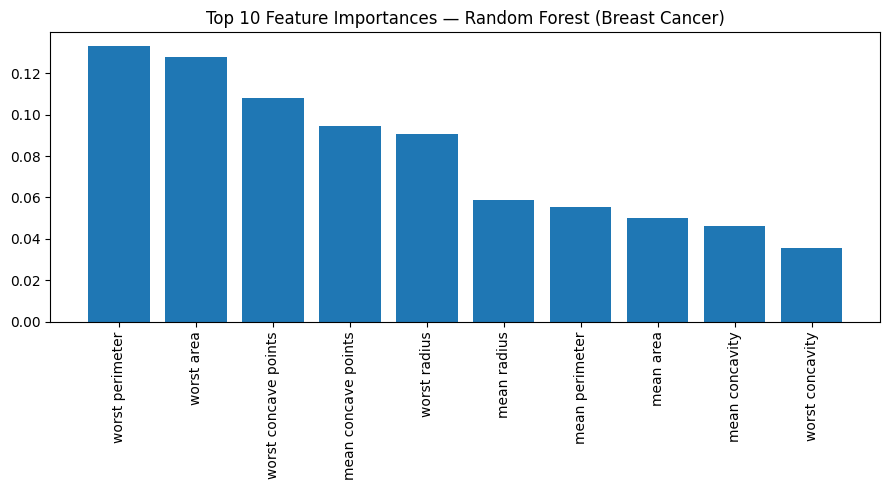

In [2]:

# Question 6 — Random Forest on Breast Cancer (Top-5 Features + Plot)
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# 1) Load data
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# 2) Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# 4) Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Top 5 features (feature : importance):")
top_k = 5
for i in indices[:top_k]:
    print(f"{feature_names[i]} : {importances[i]:.4f}")

# 5) Plot top-10 importances
top10 = indices[:10]
plt.figure(figsize=(9,5))
plt.bar(range(10), importances[top10])
plt.xticks(range(10), feature_names[top10], rotation=90)
plt.title("Top 10 Feature Importances — Random Forest (Breast Cancer)")
plt.tight_layout()
plt.show()


## Question 7
**Write a Python program to:**
- Train a **Bagging Classifier** using Decision Trees on the **Iris** dataset
- Evaluate its accuracy and **compare with a single Decision Tree**

### Plan & Steps
1. Load Iris and split data.
2. Train a single `DecisionTreeClassifier` and record test accuracy.
3. Train a `BaggingClassifier` with decision trees and compare accuracy.
4. Interpretation: Bagging generally **reduces variance**, often giving a small accuracy boost.

In [7]:

# Question 7 — Bagging vs Single Decision Tree on Iris
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 1) Load data
iris = load_iris()
X, y = iris.data, iris.target

# 2) Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1, stratify=y
)

# 3) Single Decision Tree
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

# 4) Bagging with Decision Trees (updated parameter name)
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=1
)
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)
acc_bag = accuracy_score(y_test, y_pred_bag)

print(f"Single Decision Tree accuracy: {acc_dt:.4f}")
print(f"Bagging (Decision Trees) accuracy: {acc_bag:.4f}")



Single Decision Tree accuracy: 0.9737
Bagging (Decision Trees) accuracy: 0.9737


## Question 8
**Write a Python program to:**
- Train a **Random Forest Classifier**
- **Tune hyperparameters** `max_depth` and `n_estimators` using `GridSearchCV`
- Print the **best parameters** and **final accuracy**

### Plan & Steps
1. Use the Iris dataset for speed.
2. Define a grid over `n_estimators` and `max_depth`.
3. Run `GridSearchCV` with cross-validation.
4. Report best params, CV score, and test accuracy of the best model.

In [4]:

# Question 8 — Grid Search for RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# 1) Load data & split
iris = load_iris()
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(
    iris.data, iris.target, test_size=0.25, random_state=1, stratify=iris.target
)

# 2) Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 2, 3, 4, 5]
}

# 3) Grid search
rfc = RandomForestClassifier(random_state=1)
grid = GridSearchCV(rfc, param_grid, cv=4, n_jobs=-1)
grid.fit(X_train_g, y_train_g)

print("Best parameters:", grid.best_params_)
print(f"Best CV score: {grid.best_score_:.4f}")

# 4) Evaluate on held-out test set
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_g)
test_acc = accuracy_score(y_test_g, y_pred)
print(f"Final test accuracy with best parameters: {test_acc:.4f}")


Best parameters: {'max_depth': 3, 'n_estimators': 50}
Best CV score: 0.9643
Final test accuracy with best parameters: 0.9737


## Question 9
**Write a Python program to:**
- Train a **Bagging Regressor** and a **Random Forest Regressor** on the **California Housing** dataset
- **Compare their Mean Squared Errors (MSE)**

### Plan & Steps
1. Load California Housing and split.
2. Train `BaggingRegressor` (base: `DecisionTreeRegressor`) and `RandomForestRegressor`.
3. Compute **MSE** on the test set for both.
4. Plot a simple bar chart of the two MSE values.

Bagging Regressor MSE: 0.2593
Random Forest Regressor MSE: 0.2542


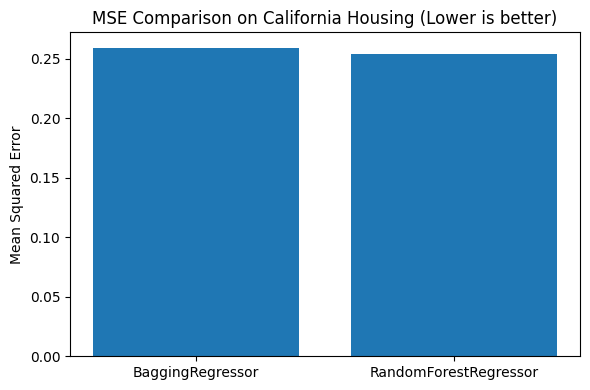

In [6]:

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1) Load data
cal = fetch_california_housing()
X, y = cal.data, cal.target

# 2) Split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# 3) Train models

# Updated: base_estimator -> estimator (for sklearn >= 1.2)
bag_reg = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=40,
    random_state=42
)
bag_reg.fit(X_train_r, y_train_r)
y_pred_bag = bag_reg.predict(X_test_r)
mse_bag = mean_squared_error(y_test_r, y_pred_bag)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_r, y_train_r)
y_pred_rf = rf_reg.predict(X_test_r)
mse_rf = mean_squared_error(y_test_r, y_pred_rf)

print(f"Bagging Regressor MSE: {mse_bag:.4f}")
print(f"Random Forest Regressor MSE: {mse_rf:.4f}")

# 4) Plot the MSEs
labels = ['BaggingRegressor', 'RandomForestRegressor']
values = [mse_bag, mse_rf]

plt.figure(figsize=(6, 4))
plt.bar(labels, values)
plt.title("MSE Comparison on California Housing (Lower is better)")
plt.ylabel("Mean Squared Error")
plt.tight_layout()
plt.show()



## Question 10
**
You are working as a data scientist at a financial institution to predict loan default. You have access to customer demographic and transaction history data.
You decide to use ensemble techniques to increase model performance.

**Explain your step-by-step approach to:**
- Choose between Bagging or Boosting
- Handle overfitting
- Select base models
- Evaluate performance using cross-validation
- Justify how ensemble learning improves decision-making in this real-world context.
**

### Answer

**1) Choose between Bagging or Boosting**  
- Start with a **Random Forest (Bagging)** baseline: robust, fast, good at reducing variance.  
- Compare with **Boosting** (e.g., Gradient Boosting / XGBoost / LightGBM): often higher accuracy by reducing bias.  
- Pick based on cross-validated metrics (ROC-AUC, PR-AUC) and stability. If data is noisy/high-variance → Bagging helps; if underfitting/complex relations → Boosting helps.

**2) Handle Overfitting**  
- **Cross-validation** with stratified folds; **early stopping** for boosting; **regularize** trees (max depth, min samples per leaf).  
- Use **feature selection/engineering**, remove leakage/correlated noise.  
- Use **subsampling** of rows/columns, **learning rate** for boosting, and limit number of trees.

**3) Select Base Models**  
- For tabular finance data, **decision trees** are strong base learners.  
- Try **logistic regression** baseline for interpretability.  
- Consider **stacking**: combine RF/GBM with linear models; meta-learner blends strengths.

**4) Evaluate via Cross-Validation**  
- Use **Stratified K-fold**; optimize **ROC-AUC** and **Precision-Recall** (class imbalance).  
- Track **calibration** (Brier score); choose thresholds by **business cost** (FP vs FN).  
- Perform **time-based split** if data is temporal to avoid leakage.

**5) Why Ensembles Improve Decisions**  
- **Higher accuracy & stability** → fewer bad loans approved, fewer good loans rejected.  
- **Consistent risk scores** support interest/pricing and capital allocation.  
- **Feature importance & SHAP** give **explanations** for regulators and stakeholders.  
- **Robustness** to noise/outliers via aggregation.

**Deployment notes:** monitor drift, retrain periodically, and maintain auditability.


---